In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

sys.path.append('../')
sys.path.append('../models')

### air_100

In [3]:
ds_name = 'air_100'
frac_err = 0.1
err_type = 'symmetry'
error_seed = 1

raw_fpath = '../raw/{}_{}{}{}.csv'.format(ds_name, frac_err, err_type, error_seed)
delta_fpath = 'result/{}_{}{}{}_delta.csv'.format(ds_name, frac_err, err_type, error_seed)
mask_fpath = '../raw/{}_{}{}{}_mask.csv'.format(ds_name, frac_err, err_type, error_seed)

df_raw = pd.read_csv(raw_fpath)
df_delta = pd.read_csv(delta_fpath)
df_mask = pd.read_csv(mask_fpath)

attrs = ['pm2.5']

In [4]:
df_delta[attrs] = abs(df_delta[attrs])
attr = 'pm2.5'
min_val = min(df_delta[attr])
max_val = max(df_delta[attr])

taus = np.linspace(min_val, max_val, 10)
print(taus)

[  1.18015876  12.168308    23.15645724  34.14460649  45.13275573
  56.12090498  67.10905422  78.09720346  89.08535271 100.07350195]


In [31]:
df_attr_res = pd.DataFrame()
df_attr_res['tau'] = taus
df_attr_res['attr'] = attr

print(df_attr_res)

          tau   attr
0    1.180159  pm2.5
1   12.168308  pm2.5
2   23.156457  pm2.5
3   34.144606  pm2.5
4   45.132756  pm2.5
5   56.120905  pm2.5
6   67.109054  pm2.5
7   78.097203  pm2.5
8   89.085353  pm2.5
9  100.073502  pm2.5


In [33]:
df_result = pd.DataFrame()

df_attr = df_delta[['timestamp', attr]]
df_attr_long = df_attr.melt(id_vars='timestamp', var_name='attribute', value_name='delta')

df_mask['is_dirty'] = True
df_all = df_attr_long.merge(df_mask, on=['timestamp', 'attribute'], how='left')

df_all['is_dirty'].fillna(False, inplace=True)
fil_dirty = df_all['is_dirty'] == True
print(df_all.head(5))

precs, recs, f1s = [], [], []

for idx, tau in enumerate(taus):
    fil_ad = df_all['delta'] > tau

    fil_cor = fil_dirty & fil_ad

    precision = fil_cor.sum() / fil_ad.sum()
    recall = fil_cor.sum() / fil_dirty.sum()
    f1 = 2 * precision * recall / (precision + recall)
    
    precs.append(precision)
    recs.append(recall)
    f1s.append(f1)

df_attr_res['precision'] = precs
df_attr_res['recall'] = recs
df_attr_res['f1'] = f1s

# print(df_attr_res)

df_result = pd.concat([df_result, df_attr_res], axis=1, sort=False)

print(df_result)

   timestamp attribute       delta  is_dirty
0         25     pm2.5   58.450760     False
1         26     pm2.5   58.460651     False
2         27     pm2.5   85.201471     False
3         28     pm2.5  100.073502     False
4         29     pm2.5   59.508888     False
          tau   attr  precision  recall        f1
0    1.180159  pm2.5   0.101010     1.0  0.183486
1   12.168308  pm2.5   0.108434     0.9  0.193548
2   23.156457  pm2.5   0.109589     0.8  0.192771
3   34.144606  pm2.5   0.121212     0.8  0.210526
4   45.132756  pm2.5   0.140000     0.7  0.233333
5   56.120905  pm2.5   0.187500     0.6  0.285714
6   67.109054  pm2.5   0.315789     0.6  0.413793
7   78.097203  pm2.5   0.363636     0.4  0.380952
8   89.085353  pm2.5   0.500000     0.1  0.166667
9  100.073502  pm2.5        NaN     0.0       NaN


/anaconda2/envs/tsc37/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars


In [44]:
df_result_long = df_result.melt(id_vars=['tau', 'attr'], var_name='metric', value_name='metric_value')
print(df_result_long.head(5))

         tau   attr     metric  metric_value
0   1.180159  pm2.5  precision      0.101010
1  12.168308  pm2.5  precision      0.108434
2  23.156457  pm2.5  precision      0.109589
3  34.144606  pm2.5  precision      0.121212
4  45.132756  pm2.5  precision      0.140000


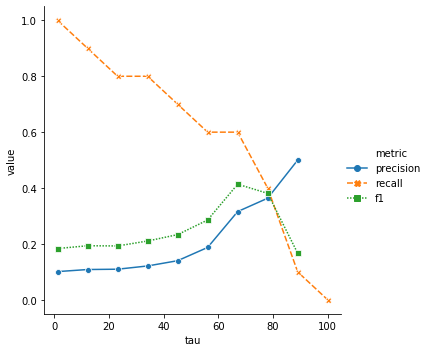

In [42]:
sns.relplot(x='tau', y='value', hue='metric', style='metric', kind='line', markers=True, data=df_result_long)

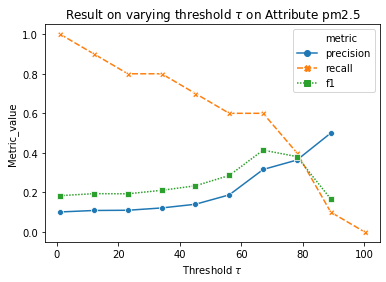

In [55]:
ax = sns.lineplot(x='tau', y='metric_value', hue='metric', style='metric', markers=True, data=df_result_long)
ax.set_title('Result on varying threshold $\\tau$ on Attribute pm2.5')
ax.set_xlabel('Threshold $\\tau$')
ax.set_ylabel('Metric_value')

fig_save = plt.gcf() # 'get current figure'
fig_save.savefig('/Users/stoke/Desktop/BRITS_{attr}.pdf'.format(attr='pm2.5'),dpi=400,bbox_inches='tight')

### air_all statistics

In [113]:
ds_name = 'air_all'
epochs = 10
raw_fpath = '../raw/{}.csv'.format(ds_name)
delta_fpath = 'result/{}_delta_e{}.csv'.format(ds_name, epochs)

df_raw = pd.read_csv(raw_fpath)
df_delta = pd.read_csv(delta_fpath)
attrs = ['pm2.5']

In [114]:
df_delta[attrs] = abs(df_delta[attrs])
mean = df_delta[attrs].mean(axis=0)
print(mean)

pm2.5    13.320343
dtype: float64


In [60]:
ds_name = 'air_all'
frac_err = 0.1
err_type = 'symmetry'
error_seed = 1
epochs = 10

raw_fpath = '../raw/{}_{}{}{}.csv'.format(ds_name, frac_err, err_type, error_seed)
delta_fpath = 'result/{}_{}{}{}_delta_e{}.csv'.format(ds_name, frac_err, err_type, error_seed, epochs)
mask_fpath = '../raw/{}_{}{}{}_mask.csv'.format(ds_name, frac_err, err_type, error_seed)
df_raw = pd.read_csv(raw_fpath)
df_delta = pd.read_csv(delta_fpath)
df_mask = pd.read_csv(mask_fpath)

In [79]:
attr = 'pm2.5'
df_delta[attr] = abs(df_delta[attr])
df_attr = df_delta[['timestamp', attr]]
df_attr_long = df_attr.melt(id_vars='timestamp', var_name='attribute', value_name='delta')
df_mask['is_dirty'] = True
df_all = df_attr_long.merge(df_mask, on=['timestamp', 'attribute'], how='left')
df_all['is_dirty'].fillna(False, inplace=True)

In [86]:
df_group = df_all.groupby('is_dirty')
means = df_group['delta'].mean()

print(means)
print(type(means))

is_dirty
False     46.281288
True     795.741107
Name: delta, dtype: float64
<class 'pandas.core.series.Series'>


In [95]:
df_dirty = df_all.loc[df_all['is_dirty'] == False]
df_dirty['delta'].describe()

count    37575.000000
mean        46.281288
std         44.854285
min          0.005134
25%         16.474253
50%         35.337568
75%         62.226526
max        849.038993
Name: delta, dtype: float64

### air_all figure

In [96]:
ds_name = 'air_all'
frac_err = 0.1
err_type = 'symmetry'
error_seed = 1
epochs = 10

raw_fpath = '../raw/{}_{}{}{}.csv'.format(ds_name, frac_err, err_type, error_seed)
delta_fpath = 'result/{}_{}{}{}_delta_e{}.csv'.format(ds_name, frac_err, err_type, error_seed, epochs)
mask_fpath = '../raw/{}_{}{}{}_mask.csv'.format(ds_name, frac_err, err_type, error_seed)
df_raw = pd.read_csv(raw_fpath)
df_delta = pd.read_csv(delta_fpath)
df_mask = pd.read_csv(mask_fpath)

In [109]:
attrs = ['pm2.5']
df_delta[attrs] = abs(df_delta[attrs])
attr = 'pm2.5'
min_val = min(df_delta[attr])
max_val = max(df_delta[attr])

taus = np.linspace(min_val, max_val, 30)
print(taus)

taus = np.linspace(200, 600, 20)
print(taus)

df_attr_res = pd.DataFrame()
df_attr_res['tau'] = taus
df_attr_res['attr'] = attr

print(df_attr_res.head(5))

[5.13433321e-03 3.52100078e+01 7.04148813e+01 1.05619755e+02
 1.40824628e+02 1.76029502e+02 2.11234375e+02 2.46439249e+02
 2.81644122e+02 3.16848996e+02 3.52053869e+02 3.87258743e+02
 4.22463616e+02 4.57668490e+02 4.92873363e+02 5.28078237e+02
 5.63283110e+02 5.98487984e+02 6.33692857e+02 6.68897731e+02
 7.04102604e+02 7.39307478e+02 7.74512352e+02 8.09717225e+02
 8.44922099e+02 8.80126972e+02 9.15331846e+02 9.50536719e+02
 9.85741593e+02 1.02094647e+03]
[200.         221.05263158 242.10526316 263.15789474 284.21052632
 305.26315789 326.31578947 347.36842105 368.42105263 389.47368421
 410.52631579 431.57894737 452.63157895 473.68421053 494.73684211
 515.78947368 536.84210526 557.89473684 578.94736842 600.        ]
          tau   attr
0  200.000000  pm2.5
1  221.052632  pm2.5
2  242.105263  pm2.5
3  263.157895  pm2.5
4  284.210526  pm2.5


In [110]:
df_result = pd.DataFrame()

df_attr = df_delta[['timestamp', attr]]
df_attr_long = df_attr.melt(id_vars='timestamp', var_name='attribute', value_name='delta')

df_mask['is_dirty'] = True
df_all = df_attr_long.merge(df_mask, on=['timestamp', 'attribute'], how='left')

df_all['is_dirty'].fillna(False, inplace=True)
fil_dirty = df_all['is_dirty'] == True
print(df_all.head(5))

precs, recs, f1s = [], [], []

for idx, tau in enumerate(taus):
    fil_ad = df_all['delta'] > tau

    fil_cor = fil_dirty & fil_ad

    precision = fil_cor.sum() / fil_ad.sum()
    recall = fil_cor.sum() / fil_dirty.sum()
    f1 = 2 * precision * recall / (precision + recall)
    
    precs.append(precision)
    recs.append(recall)
    f1s.append(f1)

df_attr_res['precision'] = precs
df_attr_res['recall'] = recs
df_attr_res['f1'] = f1s

# print(df_attr_res)

df_result = pd.concat([df_result, df_attr_res], axis=1, sort=False)

print(df_result)

   timestamp attribute       delta  is_dirty
0         25     pm2.5   38.157848     False
1         26     pm2.5   24.257135     False
2         27     pm2.5    9.127271     False
3         28     pm2.5  658.337697      True
4         29     pm2.5   17.169835     False
           tau   attr  precision    recall        f1
0   200.000000  pm2.5   0.889529  0.999042  0.941110
1   221.052632  pm2.5   0.923793  0.998802  0.959834
2   242.105263  pm2.5   0.946412  0.998323  0.971675
3   263.157895  pm2.5   0.960129  0.997844  0.978623
4   284.210526  pm2.5   0.971302  0.997126  0.984044
5   305.263158  pm2.5   0.979275  0.995928  0.987531
6   326.315789  pm2.5   0.985046  0.994012  0.989509
7   347.368421  pm2.5   0.989735  0.993054  0.991392
8   368.421053  pm2.5   0.992324  0.990898  0.991611
9   389.473684  pm2.5   0.993741  0.988743  0.991235
10  410.526316  pm2.5   0.994925  0.986108  0.990497
11  431.578947  pm2.5   0.995391  0.982754  0.989032
12  452.631579  pm2.5   0.996341  0.97820

In [111]:
df_result_long = df_result.melt(id_vars=['tau', 'attr'], var_name='metric', value_name='metric_value')
print(df_result_long.head(5))

          tau   attr     metric  metric_value
0  200.000000  pm2.5  precision      0.889529
1  221.052632  pm2.5  precision      0.923793
2  242.105263  pm2.5  precision      0.946412
3  263.157895  pm2.5  precision      0.960129
4  284.210526  pm2.5  precision      0.971302


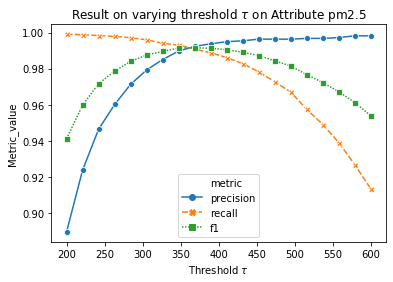

In [112]:
ax = sns.lineplot(x='tau', y='metric_value', hue='metric', style='metric', markers=True, data=df_result_long)
ax.set_title('Result on varying threshold $\\tau$ on Attribute pm2.5')
ax.set_xlabel('Threshold $\\tau$')
ax.set_ylabel('Metric_value')

fig_save = plt.gcf() # 'get current figure'
fig_save.savefig('/Users/stoke/Desktop/BRITS_{attr}_2.pdf'.format(attr='pm2.5'),dpi=400,bbox_inches='tight')

In [5]:
for k in range(1, 100):
    val = 63 * k
    
    if val % 8 == 1:
        if val % 6 == 3:
            if val % 5 == 4:
                print(val)
                print(k)

1449
23
3969
63
